<a href="https://colab.research.google.com/github/Bharathwajrk123/ML_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
true_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML project/true.csv')
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML project/fake.csv')
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df['label']=1
fake_df['label']=0
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
news_df=pd.concat([fake_df,true_df],axis=0)
news_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news_df.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
news_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
news_df=news_df.drop(['title','subject','date'],axis=1)
news_df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
news_df=news_df.sample(frac=1)
news_df.head()

,text,label
19161,,0
369,(Reuters) - U.S. President Donald Trump said i...,1
1092,With the news dropping that supposedly Trump i...,0
4320,WASHINGTON (Reuters) - The U.S. cruise missile...,1
2223,WASHINGTON (Reuters) - President Donald Trump ...,1


In [ ]:
news_df.reset_index(inplace=True)
news_df.head()

,index,text,label
0,19161,,0
1,369,(Reuters) - U.S. President Donald Trump said i...,1
2,1092,With the news dropping that supposedly Trump i...,0
3,4320,WASHINGTON (Reuters) - The U.S. cruise missile...,1
4,2223,WASHINGTON (Reuters) - President Donald Trump ...,1


In [ ]:
news_df.drop(['index'],axis=1,inplace=True)
news_df.head()

,text,label
0,,0
1,(Reuters) - U.S. President Donald Trump said i...,1
2,With the news dropping that supposedly Trump i...,0
3,WASHINGTON (Reuters) - The U.S. cruise missile...,1
4,WASHINGTON (Reuters) - President Donald Trump ...,1


In [ ]:
import re

In [ ]:
def wordopt(text):
  text=text.lower()         #lower
  text=re.sub(r'https?=//\s+|www\.\S+','',text)     #URL'S
  text=re.sub(r'<.*?>','',text)       #HTML
  text=re.sub(r'[^\w\s]','',text)     #punctuation
  text=re.sub(r'\d','',text)          #digits
  text=re.sub(r'\n',' ',text)         #newline
  return text

In [ ]:
news_df['text'] = news_df['text'].apply(wordopt)
news_df['text']

,text
0,
1,reuters us president donald trump said in a t...
2,with the news dropping that supposedly trump i...
3,washington reuters the us cruise missile stri...
4,washington reuters president donald trump is ...
...,...
44893,vienna reuters a yearold bosnian man has been...
44894,tokyo reuters japan will impose additional sa...
44895,the american people are not going to like this...
44896,for decades hillary clinton has claimed that b...


In [ ]:
x = news_df['text']
y = news_df['label']
x

,text
0,
1,reuters us president donald trump said in a t...
2,with the news dropping that supposedly trump i...
3,washington reuters the us cruise missile stri...
4,washington reuters president donald trump is ...
...,...
44893,vienna reuters a yearold bosnian man has been...
44894,tokyo reuters japan will impose additional sa...
44895,the american people are not going to like this...
44896,for decades hillary clinton has claimed that b...


In [ ]:
y

,label
0,0
1,1
2,0
3,1
4,1
...,...
44893,1
44894,1
44895,0
44896,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape

(31428,)

In [ ]:
x_test.shape

(13470,)

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_train

<31428x177045 sparse matrix of type '<class 'numpy.float64'>'
	with 6440329 stored elements in Compressed Sparse Row format>

In [ ]:
xv_test = vectorization.transform(x_test)
xv_test

<13470x177045 sparse matrix of type '<class 'numpy.float64'>'
	with 2743556 stored elements in Compressed Sparse Row format>

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
score = LR.score(xv_test,y_test)*100
print(f"Accuracy: {score}")

Accuracy: 98.83444691907943


In [ ]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7049
           1       0.98      0.99      0.99      6421

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



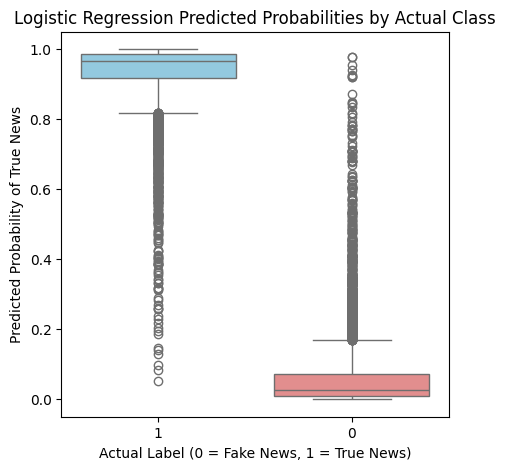

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_proba_lr = LR.predict_proba(xv_test)[:, 1]
prob_df = pd.DataFrame({"Actual Label": y_test.astype(str), "Predicted Probability": y_proba_lr})
plt.figure(figsize=(5,5))
sns.boxplot(x="Actual Label", y="Predicted Probability", data=prob_df, hue="Actual Label",
            palette={"0": "lightcoral", "1": "skyblue"}, dodge=False, legend=False)
plt.title("Logistic Regression Predicted Probabilities by Actual Class")
plt.xlabel("Actual Label (0 = Fake News, 1 = True News)")
plt.ylabel("Predicted Probability of True News")
plt.show()

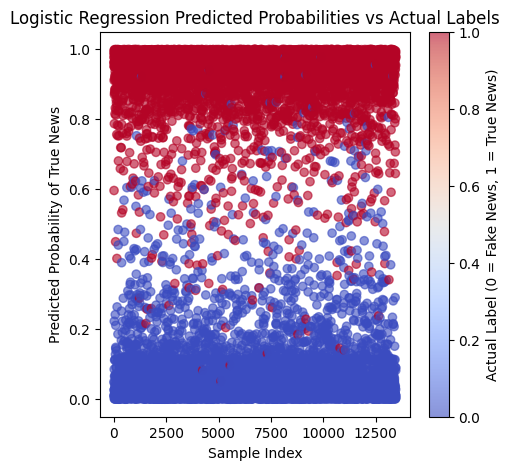

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(range(len(y_proba_lr)), y_proba_lr, c=y_test, cmap='coolwarm', alpha=0.6)
plt.colorbar(label="Actual Label (0 = Fake News, 1 = True News)")
plt.title("Logistic Regression Predicted Probabilities vs Actual Labels")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability of True News")
plt.show()

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dtc = DTC.predict(xv_test)

In [ ]:
score = DTC.score(xv_test,y_test)*100
print(f"Accuracy: {score}")

Accuracy: 99.58426132145507


In [ ]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7049
           1       1.00      1.00      1.00      6421

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



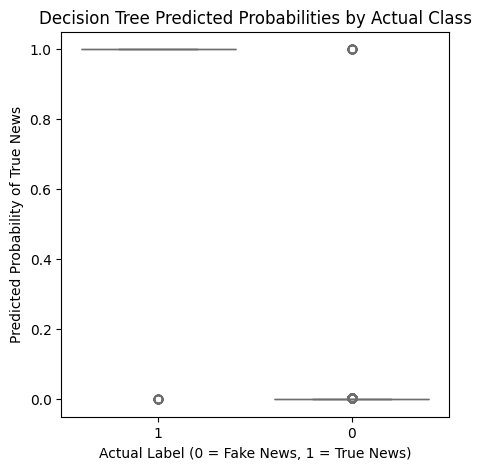

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_proba_dtc = DTC.predict_proba(xv_test)[:, 1]
dtc_prob_df = pd.DataFrame({"Actual Label": y_test.astype(str), "Predicted Probability": y_proba_dtc})
plt.figure(figsize=(5,5))
sns.boxplot(x="Actual Label", y="Predicted Probability", data=dtc_prob_df, hue="Actual Label",
            palette={"0": "lightcoral", "1": "skyblue"}, dodge=False, legend=False)
plt.title("Decision Tree Predicted Probabilities by Actual Class")
plt.xlabel("Actual Label (0 = Fake News, 1 = True News)")
plt.ylabel("Predicted Probability of True News")
plt.show()

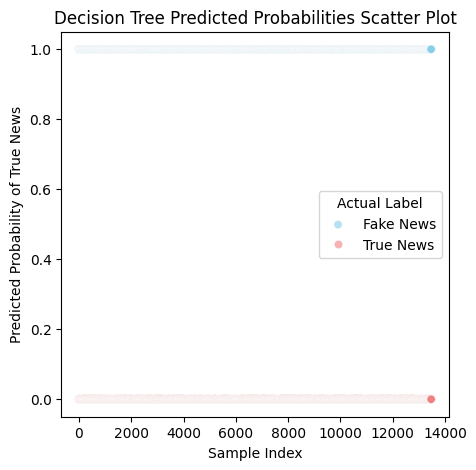

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=range(len(y_test)), y=y_proba_dtc, hue=y_test, palette={0: "lightcoral", 1: "skyblue"}, alpha=0.6)
plt.title("Decision Tree Predicted Probabilities Scatter Plot")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability of True News")
plt.legend(title="Actual Label", labels=["Fake News", "True News"])
plt.show()

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xv_train,y_train)

RandomForestClassifier()

In [ ]:
pred_rfc = rfc.predict(xv_test)

In [ ]:
score = rfc.score(xv_test,y_test)*100
print(f"Accuracy: {score}")

Accuracy: 98.96807720861173


In [ ]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7049
           1       0.99      0.99      0.99      6421

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



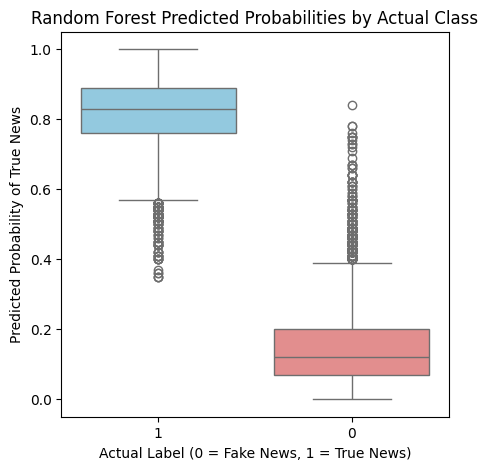

In [ ]:
y_proba_rf = rfc.predict_proba(xv_test)[:, 1]
prob_df_rf = pd.DataFrame({"Actual Label": y_test.astype(str), "Predicted Probability": y_proba_rf})
plt.figure(figsize=(5,5))
sns.boxplot(x="Actual Label", y="Predicted Probability", data=prob_df_rf, hue="Actual Label",
            palette={"0": "lightcoral", "1": "skyblue"}, dodge=False, legend=False)
plt.title("Random Forest Predicted Probabilities by Actual Class")
plt.xlabel("Actual Label (0 = Fake News, 1 = True News)")
plt.ylabel("Predicted Probability of True News")
plt.show()

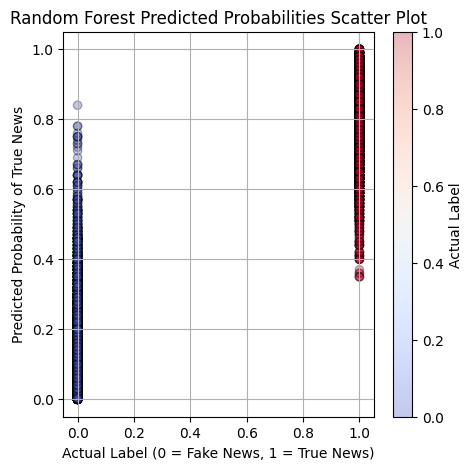

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_proba_rf, alpha=0.3, c=y_test, cmap='coolwarm', edgecolor='k')
plt.title("Random Forest Predicted Probabilities Scatter Plot")
plt.xlabel("Actual Label (0 = Fake News, 1 = True News)")
plt.ylabel("Predicted Probability of True News")
plt.colorbar(label='Actual Label')
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
abc.fit(xv_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [ ]:
pred_abc = abc.predict(xv_test)

In [ ]:
score = rfc.score(xv_test,y_test)*100
print(f"Accuracy: {score}")

Accuracy: 98.96807720861173


In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(xv_train,y_train)

GradientBoostingClassifier()

In [ ]:
pred_gbc = gbc.predict(xv_test)

In [ ]:
score = gbc.score(xv_test,y_test)*100
print(f"Accuracy: {score}")

Accuracy: 99.57683741648107


In [ ]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7049
           1       0.99      1.00      1.00      6421

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



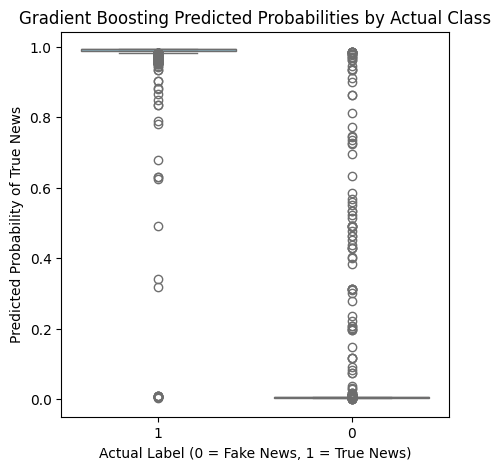

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
y_proba_gbc = gbc.predict_proba(xv_test)[:, 1]
prob_df_gbc = pd.DataFrame({"Actual Label": y_test.astype(str), "Predicted Probability": y_proba_gbc})
plt.figure(figsize=(5,5))
sns.boxplot(x="Actual Label", y="Predicted Probability", data=prob_df_gbc, hue="Actual Label",
            palette={"0": "lightcoral", "1": "skyblue"}, dodge=False, legend=False)
plt.title("Gradient Boosting Predicted Probabilities by Actual Class")
plt.xlabel("Actual Label (0 = Fake News, 1 = True News)")
plt.ylabel("Predicted Probability of True News")
plt.show()

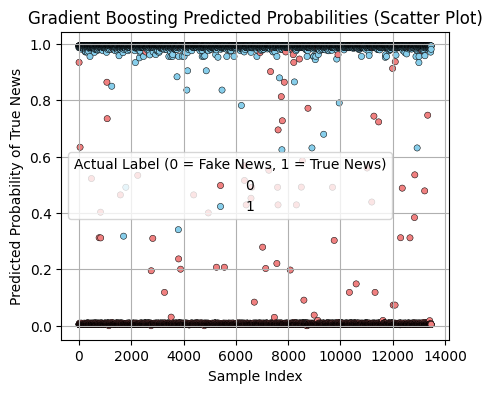

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=range(len(y_test)), y=y_proba_gbc, hue=y_test, palette={0: "lightcoral", 1: "skyblue"}, s=20, edgecolor="k")
plt.title("Gradient Boosting Predicted Probabilities (Scatter Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability of True News")
plt.legend(title="Actual Label (0 = Fake News, 1 = True News)")
plt.grid()
plt.show()

In [ ]:
#predictive model
def output_label(n):
  if n==0:
    return "It is a Fake News"
  elif n==1:
    return "It is a Geniune News"

In [ ]:
def manual_testing(news):
  testing_news = {"text": [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_lr = LR.predict(new_xv_test)
  pred_dtc = DTC.predict(new_xv_test)
  pred_rfc = rfc.predict(new_xv_test)
  pred_gbc = gbc.predict(new_xv_test)
  return "\n\nLR Prediction: {}   \nGBC Prediction: {}  \nDTC Prediction: {}  \nRFC Prediction: {}".format(output_label(pred_lr[0]), output_label(pred_gbc[0]),output_label(pred_dtc[0]),  output_label(pred_rfc[0]))

In [ ]:
news_article = str(input())


modi is death


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
base_estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

In [ ]:
meta_model = LogisticRegression()

In [ ]:
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model, passthrough=True)

In [ ]:
stacking_model.fit(xv_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_stacking = stacking_model.predict(xv_test)
accuracy = accuracy_score(y_test, pred_stacking)*100
print(f"Stacking Model Accuracy: {accuracy}")
print(classification_report(y_test, pred_stacking))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pred_lr = base_estimators[0][1].predict(xv_test)
pred_dt = base_estimators[1][1].predict(xv_test)
pred_rf = base_estimators[2][1].predict(xv_test)
pred_gb = base_estimators[3][1].predict(xv_test)
pred_stacking = stacking_model.predict(xv_test)
predictions = np.array([pred_lr, pred_dt, pred_rf, pred_gb, pred_stacking]).T
plt.figure(figsize=(10, 6))
sns.boxplot(data=predictions, notch=True, patch_artist=True,
            labels=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Stacking'])
plt.title('Boxplot of Model Predictions')
plt.ylabel('Predicted Class')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pred_lr, pred_stacking, label='LR vs Stacking', alpha=0.5)
plt.scatter(pred_dt, pred_stacking, label='DT vs Stacking', alpha=0.5)
plt.scatter(pred_rf, pred_stacking, label='RF vs Stacking', alpha=0.5)
plt.scatter(pred_gb, pred_stacking, label='GB vs Stacking', alpha=0.5)

plt.title('Scatter Plot: Base Models vs Stacking Model Predictions')
plt.xlabel('Base Model Predictions')
plt.ylabel('Stacking Model Predictions')
plt.legend()
plt.show()